In [1]:
import glob
import numpy
import pandas
import pickle

In [2]:
with open('../Data/allplayerFantasyGameLogs.pickle', 'rb') as handle:
    games = pickle.load(handle)

In [3]:
games.head()

,GAME_DATE,SEASON_ID,Player_ID,Game_ID,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,PTS,PLUS_MINUS,DouBL,TriBL,FanPTs,fullName,position1,Team,OpponentTeam,HomeGame
0,2015-10-27,22015,101126,0021500003,NOP @ GSW,L,19,0,1,0.000,...,0,-21,False,False,6.50,Nate Robinson,PG,NOP,GSW,0
1,2015-10-27,22015,202389,0021500002,CLE @ CHI,L,21,2,6,0.333,...,5,-1,False,False,16.75,Timofey Mozgov,C,CLE,CHI,0
2,2015-10-27,22015,202087,0021500003,NOP @ GSW,L,27,4,5,0.800,...,8,-8,False,False,20.25,Alonzo Gee,SF,NOP,GSW,0
3,2015-10-27,22015,2581,0021500001,DET @ ATL,W,16,1,6,0.167,...,3,-14,False,False,10.00,Steve Blake,PG,DET,ATL,0
4,2015-10-27,22015,202710,0021500002,CHI vs. CLE,W,37,6,14,0.429,...,17,3,False,False,32.25,Jimmy Butler,SG,CHI,CLE,1


In [4]:
with open('../Data/PlayerFeaturesTable_02_29_2016.pickle', 'rb') as handle:
    players = allplayerFeaturesTable = pickle.load(handle)

In [5]:
players.head()

,fullName,Player_ID,Team,position1,NumGames,AvgFanPTs,AvgPTS,AvgMIN,AvgFGM,AvgFGA,...,AvgSTL,AvgTOV,AvgPLUS_MINUS,NumDouBL,NumTriBL,Last3GameAvgFanPTs,Last6GameAvgFanPTs,Last3GameAvgMIN,Last3GameAvgPTS,Rank
0,Nate Robinson,101126,NOP,PG,2,4.000000,0.000000,11.500000,0.000000,0.500000,...,0.500000,0.000000,-10.000000,0,0,4.000000,4.000000,11.500000,0.000000,benchPlayer
1,Timofey Mozgov,202389,CLE,C,56,14.223214,6.357143,17.821429,2.732143,4.982143,...,0.285714,0.964286,0.214286,1,0,15.500000,17.750000,21.333333,7.666667,belowAvg
2,Alonzo Gee,202087,NOP,SF,58,11.012931,3.827586,21.448276,1.534483,3.172414,...,0.896552,0.637931,-2.517241,0,0,10.500000,7.583333,20.333333,4.333333,belowAvg
3,Steve Blake,2581,DET,PG,36,11.430556,4.277778,16.000000,1.527778,3.944444,...,0.416667,1.500000,-1.138889,0,0,12.750000,10.375000,16.333333,1.666667,belowAvg
4,Jimmy Butler,202710,CHI,SG,48,39.682292,22.375000,37.812500,7.437500,16.250000,...,1.687500,1.979167,0.187500,6,0,39.833333,39.125000,37.666667,21.333333,advanced


In [6]:
pastwinners = pandas.read_csv('../Scraping/NumberFire/numberFireBestTeam.csv')
# strip '$' from Salary, convert to integer
pastwinners['Salary'] = pastwinners['Salary'].map(lambda ele: int(ele.replace('$', '')))

In [7]:
pastwinners.head()

,Date,PlayerName,Position,Salary,Pts,R,A,S,T,B,FP
0,11-17-15,Hassan Whiteside (MIA),C,8100,22,14,0,0,4,10,62
1,11-17-15,Reggie Jackson (DET),PG,7700,23,6,12,1,5,0,50
2,11-17-15,Brook Lopez (BKN),C,7100,24,10,1,1,1,3,47
3,11-17-15,Kemba Walker (CHA),PG,6400,31,4,1,3,1,1,46
4,11-17-15,Danilo Gallinari (DEN),SF,6200,32,8,8,0,3,0,55


In [9]:
# split past winners by date
gb = pastwinners.groupby('Date')
groups = [gb.get_group(x) for x in gb.groups]

In [11]:
# calculate distribution of positions each week
df = pandas.DataFrame()

for row_num in range(0, len(groups)):
    position_counts = groups[row_num]['Position'].value_counts(sort=True)
    date = groups[row_num]['Date'].unique()
    lineup = pandas.Series(date).append(position_counts)
    df[row_num] = lineup

df = df.transpose()
df.columns = ['Date', 'PG', 'PF', 'C', 'SG', 'SF']

In [13]:
df.Date = pandas.to_datetime(df.Date)

In [15]:
df.set_index('Date',inplace=True)

In [19]:
df.sort_index(inplace=True)

In [21]:
df.head(20)

,PG,PF,C,SG,SF
Date,,,,,
2015-11-17,2,2,2,1,1
2015-11-19,2,2,1,2,1
2015-11-22,2,2,2,1,1
2015-11-23,3,2,1,1,1
2015-11-24,1,1,1,2,3
2015-11-30,2,2,2,1,1
2015-12-01,2,2,2,1,1
2015-12-02,3,1,1,1,2
2015-12-03,2,1,1,2,2


In [25]:
tt = pandas.DataFrame(df.sum()).transpose()

In [31]:
tt = pandas.melt(tt,value_name='Frequency',var_name='Position')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [37]:
sns.set_style("whitegrid")

###What is the position to be mostly selected in the past winning Lineups?

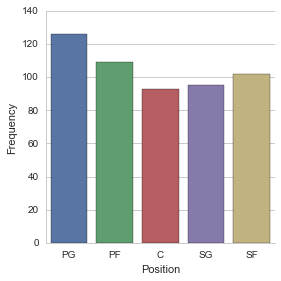

In [45]:
sns.factorplot(x="Position", y='Frequency',data=tt,kind='bar')

###What are most popular players to be selected in the winning Lineups?

In [160]:
def plot_most_selected_players(position,pastwinners):
    player_Count_df = pandas.DataFrame(pastwinners[['PlayerName']].groupby('PlayerName').size(),columns=["Count"]).reset_index()
    winningPlayersByPos = player_Count_df.merge(pastwinners[['PlayerName','Position']],how='inner',on='PlayerName')
    winningPlayersByPos.drop_duplicates(inplace=True)
    tmp = winningPlayersByPos[winningPlayersByPos.Position==position].sort_values('Count',ascending=False).head(15)
    g = sns.factorplot(x="PlayerName", y="Count", data=tmp, kind="bar",palette="Blues_d",size=5,aspect=2) 
    g.set_xticklabels(rotation=90)
    return(tmp)

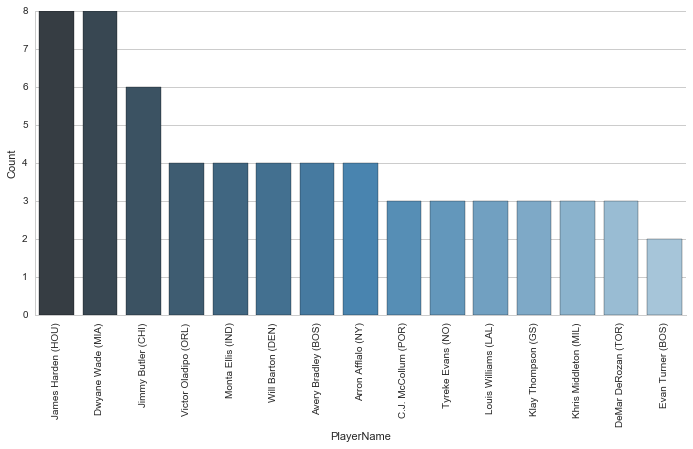

In [161]:
SG_players = plot_most_selected_players('SG',pastwinners)

In [162]:
SG_players.head()

,PlayerName,Count,Position
207,James Harden (HOU),8,SG
136,Dwyane Wade (MIA),8,SG
232,Jimmy Butler (CHI),6,SG
510,Victor Oladipo (ORL),4,SG
381,Monta Ellis (IND),4,SG


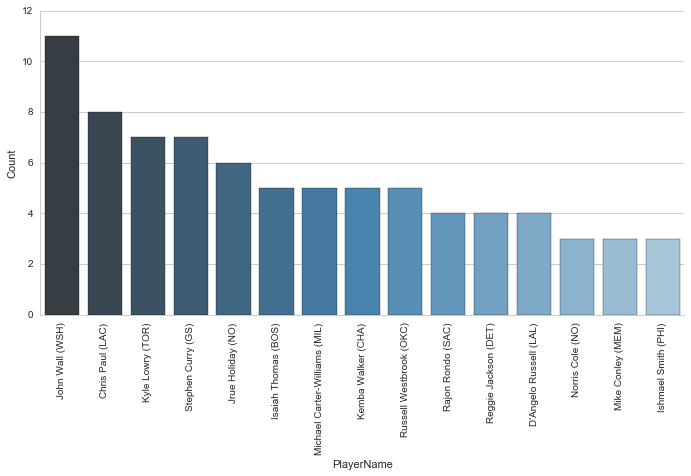

In [158]:
plot_most_selected_players('PG',pastwinners)

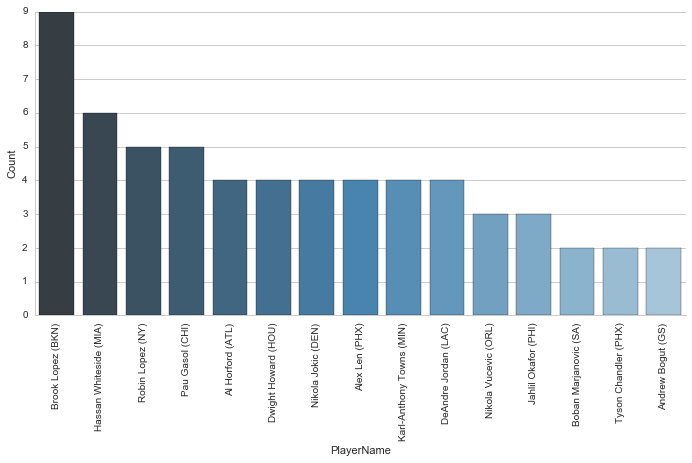

In [164]:
C_players = plot_most_selected_players('C',pastwinners)

In [11]:
# consider total cost by date
weeklycost = numpy.array([group['Salary'].sum() for group in groups])
print weeklycost

[49200 49000 49900 50000 48500 49400 49200 49700 48900 49500 49700 48200
 49400 49800 49700 49600 50000 49100 49700 50000 49800 49100 49700 48800
 50000 49900 49900 49900 50000 49500 49900 50000 49300 49900 49500 49700
 49900 49900 49700 49900 49700 49800 48500 49800 48100 49800 49600 49500
 48700 49800 49800 49100 48900 49500 49600 49700 49100 49500 49400 49900
 50000 49600 49600 49900 49200 49600]


In [12]:
# consider mean and std of winning lineup cost
print weeklycost.mean()
print weeklycost.std()

49522.7272727
448.159689662


In [27]:
df = pandas.read_csv('../Data/SalaryHistory/2015-11-16.csv', sep=';')
# remove $ and , characters to convert salary to integer
df['DK Salary'] = df['DK Salary'].map(lambda ele: int(ele.replace('$', '').replace(',','')))
df.head()

,Date,GID,Pos,Name,Starter,DK Pts,DK Salary,Team,H/A,Oppt,Team Score,Oppt Score,Minutes,Stat line
0,20151116,4382,PG,"Knight, Brandon",1,78.00,7000,pho,H,lal,120,101,40.78,30pt 10rb 15as 4st 2to 3trey 11-23fg 5-7ft
1,20151116,4079,PG,"Westbrook, Russell",1,72.00,12200,okc,A,mem,114,122,38.53,40pt 4rb 14as 3st 8to 5trey 13-19fg 9-13ft
2,20151116,4523,PG,"Lillard, Damian",1,47.75,8700,por,A,sas,80,93,41.97,27pt 7rb 6as 1st 1bl 3to 1trey 10-21fg 6-6ft
3,20151116,3979,PG,"Conley, Mike",1,46.50,6000,mem,H,okc,122,114,31.38,22pt 4rb 9as 2st 4trey 8-13fg 2-3ft
4,20151116,4073,PG,"Rose, Derrick",1,41.50,5900,chi,H,ind,96,95,33.22,23pt 2rb 6as 2st 1bl 2trey 9-18fg 3-4ft


In [14]:
pastwinners.loc[pastwinners['Date'] == '11-17-15']

,Date,PlayerName,Position,Salary,Pts,R,A,S,T,B,FP
0,11-17-15,Hassan Whiteside (MIA),C,8100,22,14,0,0,4,10,62.00
1,11-17-15,Reggie Jackson (DET),PG,7700,23,6,12,1,5,0,50.00
2,11-17-15,Brook Lopez (BKN),C,7100,24,10,1,1,1,3,47.00
3,11-17-15,Kemba Walker (CHA),PG,6400,31,4,1,3,1,1,46.00
4,11-17-15,Danilo Gallinari (DEN),SF,6200,32,8,8,0,3,0,55.00
5,11-17-15,Kristaps Porzingis (NY),PF,5900,29,11,0,0,1,1,46.75
6,11-17-15,Will Barton (DEN),SG,4700,17,7,2,1,1,2,35.75
7,11-17-15,Ersan Ilyasova (DET),PF,3800,20,6,2,1,0,0,34.50


In [86]:
# combine historical data into one dataframe

list = []
for file in glob.glob('../Data/SalaryHistory/*.csv'):
    list.append(pandas.read_csv(file, sep=';'))

pastsalaries = pandas.concat(list)

# drop NA values
pastsalaries = pastsalaries.dropna()

# remove $ and , characters to convert salary to integer
pastsalaries['DK Salary'] = pastsalaries['DK Salary'].astype(str).map(lambda ele: int(ele.replace('$', '').replace(',','')))

pastsalaries.head()

,Date,GID,Pos,Name,Starter,DK Pts,DK Salary,Team,H/A,Oppt,Team Score,Oppt Score,Minutes,Stat line
0,20160306,4224,SG,"Harden, James",1,71.75,10500,hou,A,tor,113,107,42.68,40pt 5rb 14as 1st 1to 3trey 11-20fg 15-19ft
1,20160306,4079,PG,"Westbrook, Russell",1,49.50,10800,okc,A,mil,104,96,38.83,15pt 10rb 11as 1st 1bl 7to 1trey 3-7fg 8-11ft
2,20160306,4369,PG,"Jackson, Reggie",1,48.75,6600,det,H,por,123,103,34.08,30pt 1rb 9as 2st 1to 1trey 11-19fg 7-7ft
3,20160306,4885,SG,"Booker, Devin",1,47.50,4800,pho,A,mem,109,100,42.82,27pt 2rb 9as 1st 1bl 3to 4trey 8-17fg 7-7ft
4,20160306,3891,PG,"Lowry, Kyle",1,42.00,8800,tor,H,hou,107,113,38.28,17pt 4rb 9as 3st 3to 4trey 5-10fg 3-5ft


In [89]:
# look at salary and DK points correlation across all players
pastsalaries['DK Pts'].corr(pastsalaries['DK Salary'])

0.6593116497213225

In [90]:
# look at salary and DK points correlation across past winners
pastwinners['Pts'].corr(pastwinners['Salary'])

0.53014724730430951